# Projet GGVIE : Détection de moments clés d'une entreprise

## Import des librairies

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [ ]:
# Pour afficher toutes les colonnes et lignes
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Lecture des données

In [3]:
# Stock etablissement historique
stock_etablissement_hist = pd.read_csv("../data_Projet_GGVie/StockEtablissementHistorique_utf8.csv", chunksize=1000000, low_memory=False)
stock_etablissement_hist = pd.DataFrame(stock_etablissement_hist.get_chunk(1000000))

# Stock etablissement
stock_etablissement = pd.read_csv("../data_Projet_GGVie/StockEtablissement_utf8.csv", chunksize=1000000, low_memory=False)
stock_etablissement = pd.DataFrame(stock_etablissement.get_chunk(1000000))

# Stock etablissement lien succession
stock_etablissement_lien_succession = pd.read_csv("../data_Projet_GGVie/StockEtablissementLiensSuccession_utf8.csv", chunksize=1000000, low_memory=False)
stock_etablissement_lien_succession = pd.DataFrame(stock_etablissement_lien_succession.get_chunk(1000000))

# Stock unite legale
stock_unite_legale = pd.read_csv("../data_Projet_GGVie/StockUniteLegale_utf8.csv", chunksize=1000000, low_memory=False)
stock_unite_legale = pd.DataFrame(stock_unite_legale.get_chunk(1000000))

# Stock unite legale historique
stock_unite_legale_hist = pd.read_csv("../data_Projet_GGVie/StockUniteLegaleHistorique_utf8.csv", chunksize=1000000, low_memory=False)
stock_unite_legale_hist = pd.DataFrame(stock_unite_legale_hist.get_chunk(1000000))

"""# Infogreffe 2022
infogreffe_2022 = pd.read_csv("../data_Projet_GGVie/chiffres-cles-2022.csv", chunksize=1000000,low_memory=False)
infogreffe_2022 = pd.DataFrame(infogreffe_2022.get_chunk(1000000))"""

'# Infogreffe 2022\ninfogreffe_2022 = pd.read_csv("../data_Projet_GGVie/chiffres-cles-2022.csv", chunksize=1000000,low_memory=False)\ninfogreffe_2022 = pd.DataFrame(infogreffe_2022.get_chunk(1000000))'

In [4]:
infogreffe_2022 = pd.read_csv("../data_Projet_GGVie/chiffres-cles-2022.csv", chunksize=1000000,low_memory=False)

In [5]:
# Pour voir les colonnes en commun
#print(stock_etablissement.columns.intersection(stock_etablissement_hist.columns))
#print(stock_unite_legale.columns.intersection(stock_unite_legale_hist.columns))
print(stock_unite_legale_hist.columns.intersection(stock_etablissement.columns))

Index(['siren', 'dateDebut'], dtype='object')


In [7]:
#print(stock_unite_legale_hist['siren'].intersection(stock_etablissement['siren']))

In [ ]:
common_elements = stock_unite_legale_hist[stock_unite_legale_hist['siren'].isin(stock_etablissement['siren'])]

In [ ]:
common_elements

### Merge des données

In [8]:
# Sous-dataframe stock
stock_merged = stock_unite_legale.merge(stock_etablissement,on='siren',how='left')

# Sous-dataframe historiques
stock_hist_merged = stock_unite_legale_hist.merge(stock_etablissement_hist,on=['siren','dateDebut','dateFin'],how='left')

# Sous-dataframe unite legales
stock_unite_legale_merged = stock_unite_legale.merge(stock_unite_legale_hist,on=['siren', 'dateDebut', 'etatAdministratifUniteLegale', 'nomUniteLegale',
       'nomUsageUniteLegale', 'denominationUniteLegale',
       'denominationUsuelle1UniteLegale', 'denominationUsuelle2UniteLegale',
       'denominationUsuelle3UniteLegale', 'categorieJuridiqueUniteLegale',
       'activitePrincipaleUniteLegale',
       'nomenclatureActivitePrincipaleUniteLegale', 'nicSiegeUniteLegale',
       'economieSocialeSolidaireUniteLegale', 'societeMissionUniteLegale',
       'caractereEmployeurUniteLegale'],how='left')

# Sous-dataframe etablissements
stock_etablissement_merged = stock_etablissement.merge(stock_etablissement_hist,on=['siren', 'nic', 'siret', 'dateDebut', 'etatAdministratifEtablissement',
       'enseigne1Etablissement', 'enseigne2Etablissement',
       'enseigne3Etablissement', 'denominationUsuelleEtablissement',
       'activitePrincipaleEtablissement',
       'nomenclatureActivitePrincipaleEtablissement',
       'caractereEmployeurEtablissement'])

In [ ]:
stock_etablissement.shape[1]

In [32]:
stock_etablissement_merged

,siren,nic,siret,statutDiffusionEtablissement,dateCreationEtablissement,trancheEffectifsEtablissement,anneeEffectifsEtablissement,activitePrincipaleRegistreMetiersEtablissement,dateDernierTraitementEtablissement,etablissementSiege,...,denominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,caractereEmployeurEtablissement,dateFin,changementEtatAdministratifEtablissement,changementEnseigneEtablissement,changementDenominationUsuelleEtablissement,changementActivitePrincipaleEtablissement,changementCaractereEmployeurEtablissement
0,325175,16,32517500016,O,2000-09-26,NaN,NaN,3212ZZ,2015-03-18T00:58:59,False,...,NaN,32.12Z,NAFRev2,N,NaN,True,False,False,False,False
1,325175,24,32517500024,O,2008-05-20,NaN,NaN,NaN,2011-12-12T09:40:04,False,...,NaN,47.89Z,NAFRev2,N,NaN,True,False,False,False,False
2,325175,32,32517500032,O,2009-05-27,NaN,NaN,NaN,2014-07-08T00:10:21,False,...,NaN,32.12Z,NAFRev2,N,NaN,True,False,False,False,False
3,325175,40,32517500040,O,2011-10-21,NaN,NaN,3212ZZ,2015-03-18T00:58:59,False,...,NaN,32.12Z,NAFRev2,N,NaN,True,False,False,False,False
4,325175,57,32517500057,O,2014-01-07,NaN,NaN,NaN,2018-07-10T14:17:15,False,...,NaN,32.12Z,NAFRev2,N,NaN,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394705,215103771,30,21510377100030,O,2009-12-25,03,2020.0,NaN,2022-08-29T09:07:33,False,...,NaN,85.20Z,NAFRev2,N,NaN,False,False,False,False,False
394706,215103789,16,21510378900016,O,1983-03-01,02,2020.0,NaN,2022-08-29T09:07:33,True,...,NaN,84.11Z,NAFRev2,O,NaN,False,False,False,True,False
394707,215103789,24,21510378900024,O,1983-12-21,NN,NaN,NaN,2021-10-27T08:08:45,False,...,NaN,85.20Z,NAFRev2,N,NaN,False,True,False,False,False
394708,215103789,32,21510378900032,O,1995-12-25,NN,NaN,NaN,2009-01-12T11:17:58,False,...,NaN,36.00Z,NAFRev2,N,NaN,False,False,False,True,False


### Exploration des données

In [36]:
#df = stock_etablissement_merged[stock_etablissement_merged['siren'] == 325175]
df = stock_etablissement_merged

In [31]:
df = df[['dateCreationEtablissement','changementEtatAdministratifEtablissement']]

,siren,nic,siret,statutDiffusionEtablissement,dateCreationEtablissement,trancheEffectifsEtablissement,anneeEffectifsEtablissement,activitePrincipaleRegistreMetiersEtablissement,dateDernierTraitementEtablissement,etablissementSiege,...,denominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,caractereEmployeurEtablissement,dateFin,changementEtatAdministratifEtablissement,changementEnseigneEtablissement,changementDenominationUsuelleEtablissement,changementActivitePrincipaleEtablissement,changementCaractereEmployeurEtablissement
0,325175,16,32517500016,O,2000-09-26,NaN,NaN,3212ZZ,2015-03-18T00:58:59,False,...,NaN,32.12Z,NAFRev2,N,NaN,True,False,False,False,False
1,325175,24,32517500024,O,2008-05-20,NaN,NaN,NaN,2011-12-12T09:40:04,False,...,NaN,47.89Z,NAFRev2,N,NaN,True,False,False,False,False
2,325175,32,32517500032,O,2009-05-27,NaN,NaN,NaN,2014-07-08T00:10:21,False,...,NaN,32.12Z,NAFRev2,N,NaN,True,False,False,False,False
3,325175,40,32517500040,O,2011-10-21,NaN,NaN,3212ZZ,2015-03-18T00:58:59,False,...,NaN,32.12Z,NAFRev2,N,NaN,True,False,False,False,False
4,325175,57,32517500057,O,2014-01-07,NaN,NaN,NaN,2018-07-10T14:17:15,False,...,NaN,32.12Z,NAFRev2,N,NaN,True,False,False,False,False
5,325175,65,32517500065,O,2018-02-07,NaN,NaN,NaN,2019-12-13T13:21:28,True,...,NaN,32.12Z,NAFRev2,N,NaN,False,False,False,False,False


In [30]:
counts = df.groupby("dateCreationEtablissement")["changementEtatAdministratifEtablissement"].sum()

# Convertir la colonne de valeurs booléennes en entier
df["changementEtatAdministratifEtablissement"] = df["changementEtatAdministratifEtablissement"].astype(int)

# Tracer un graphique à barres
counts.plot(kind="bar")
plt.xlabel("Date")
plt.ylabel("Changement État Administratif Etablissement")
plt.show()

<ipython-input-30-32db1323b7d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["changementEtatAdministratifEtablissement"] = df["changementEtatAdministratifEtablissement"].astype(int)


TypeError: no numeric data to plot

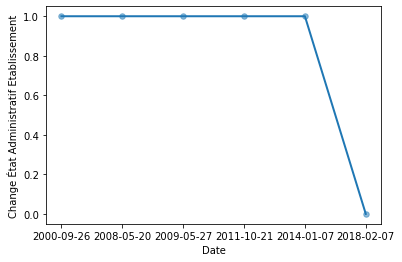

In [27]:
# Tracer un nuage de points
plt.scatter(counts.index, counts.values, s=30, alpha=0.5)

# Tracer une courbe de tendance
plt.plot(counts.index, counts.values, linewidth=2)

# Ajouter des étiquettes d'axes
plt.xlabel("Date")
plt.ylabel("Change État Administratif Etablissement")

# Afficher le graphique
plt.show()

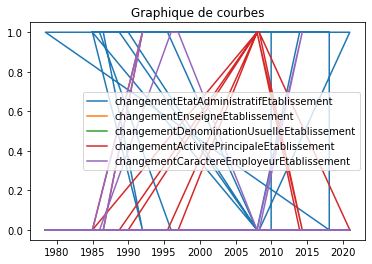

In [41]:
stock_etablissement_merged.columns
df = df[['dateDebut','changementEtatAdministratifEtablissement','changementEnseigneEtablissement',
       'changementDenominationUsuelleEtablissement',
       'changementActivitePrincipaleEtablissement',
       'changementCaractereEmployeurEtablissement']]

df = df.head(10000)

columns = ['changementEtatAdministratifEtablissement',
       'changementEnseigneEtablissement',
       'changementDenominationUsuelleEtablissement',
       'changementActivitePrincipaleEtablissement',
       'changementCaractereEmployeurEtablissement']

df["dateDebut"] = pd.to_datetime(df["dateDebut"])

# Tracer les courbes avec des dates en abscisse et des valeurs booléennes en ordonnées
for column in columns:
    plt.plot(df["dateDebut"], df[column], label=column)

# Ajouter une légende au graphique
plt.legend()

# Ajouter un titre au graphique
plt.title("Graphique de courbes")

# Afficher le graphique
plt.show()